# Check poisson assumptions

In [2]:
%load_ext autoreload
%autoreload 2

import src.data as data
import src.simulation as sim
import scanpy as sc
import episcanpy as epi
import anndata as ad
import seaborn as sns
import matplotlib.pyplot as plt
import src.plots as myplt
from pathlib import Path
import numpy as np
import scipy.stats as stats

In [3]:
file_path=Path('data/mouse_brain_5k/bin_by_cell_filtered.h5ad')

In [4]:
epidata = data.MouseBrainDataset()
# adata = epidata.load_mtx(matrix_path=Path('data/mouse_brain_5k/bin_by_cell.h5ad'))
# adata = epidata.get_window_mtx(matrix_path=Path('data/mouse_brain_5k/10000bin_by_cell.h5ad'), window_size=10000, save=True)
# adata = epidata.get_peak_mtx(matrix_path=Path('data/mouse_brain_5k/peak_by_cell.h5ad'), save=True)
adata = epidata.load_mtx(matrix_path=file_path)

## Check poisson

In [4]:
adata.obs['lib_size'] = adata.X.sum(1)
adata.obs['mean'] = adata.X.mean(1)
adata.obs['var'] = adata.X.power(2).mean(1) - np.square(adata.X.mean(1))

In [5]:
stats.pearsonr(adata.obs['lib_size'], adata.obs['var'])

PearsonRResult(statistic=0.9379384529857181, pvalue=0.0)

In [6]:
stats.pearsonr(adata.obs['lib_size'], adata.obs['mean'])

PearsonRResult(statistic=0.9999999999999973, pvalue=0.0)

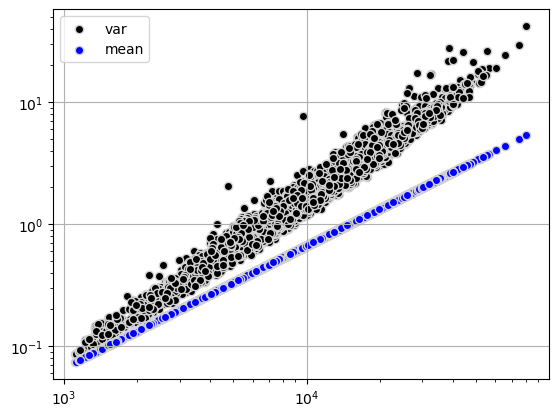

In [7]:
fig = plt.figure()
ax = fig.add_subplot()
ax.grid()
ax.scatter(adata.obs['lib_size'], adata.obs['var'], color='black', edgecolors='lightgrey', label='var')
ax.scatter(adata.obs['lib_size'], adata.obs['mean'], color='blue', edgecolors='lightgrey', label='mean')
ax.set(xscale='log', yscale='log')
ax.legend()

In [8]:
stats.pearsonr(adata.obs['lib_size'], adata.obs['var'] / adata.obs['mean'])

PearsonRResult(statistic=0.7516723347423679, pvalue=0.0)

[None]

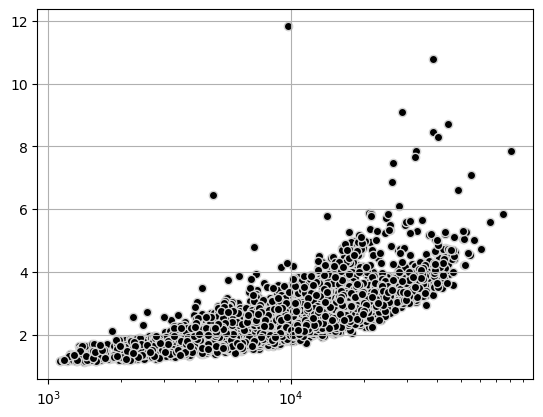

In [9]:
fig = plt.figure()
ax = fig.add_subplot()
ax.grid()
ax.scatter(adata.obs['lib_size'], adata.obs['var'] / adata.obs['mean'], color='black', edgecolors='lightgrey')
ax.set(xscale='log')

615 of 3649 observations remain (-3034)
615 of 3649 observations remain (-3034)
15032 of 15032 features remain (0)


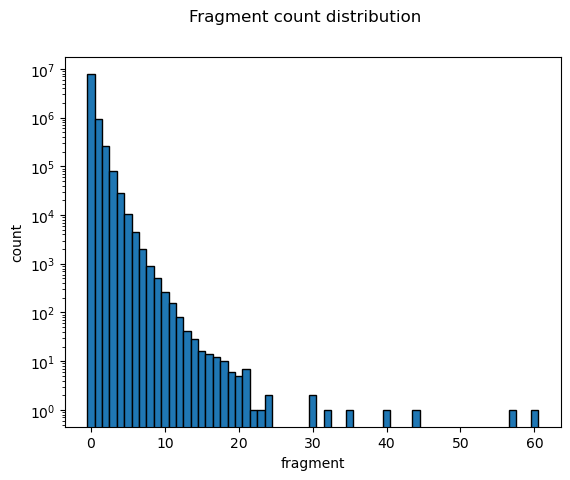

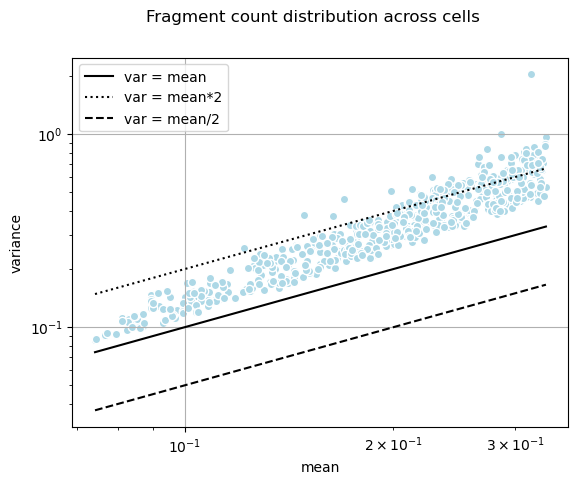

In [10]:
adata_tmp = adata.copy()
epi.pp.set_filter(adata_tmp, "n_counts", max_threshold=5000)
adata_tmp = epi.pp.apply_filters(adata_tmp, verbose=True)
myplt.plot_count_distribution(adata_tmp, title='Fragment count distribution')
myplt.plot_count_mean_var(adata_tmp, title='Fragment count distribution across cells')

2146 of 3649 observations remain (-1503)
2146 of 3649 observations remain (-1503)
15032 of 15032 features remain (0)


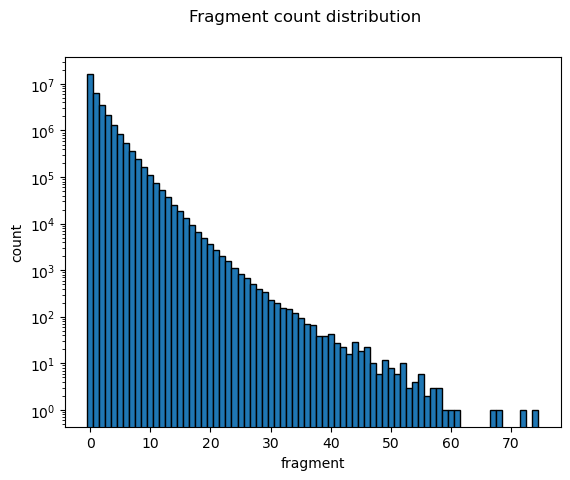

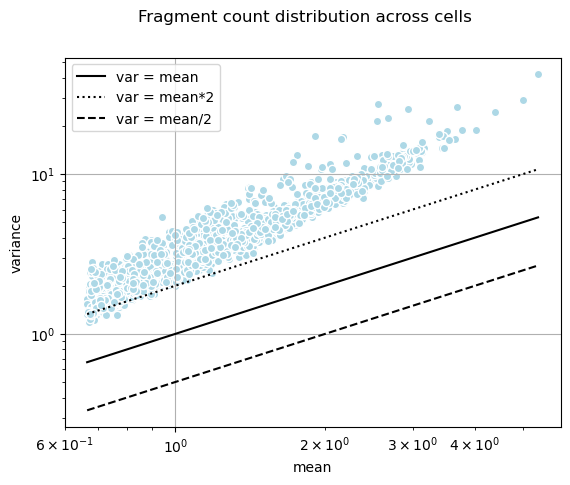

In [11]:
adata_tmp = adata.copy()
epi.pp.set_filter(adata_tmp, "n_counts", min_threshold=1e4)
adata_tmp = epi.pp.apply_filters(adata_tmp, verbose=True)
myplt.plot_count_distribution(adata_tmp, title='Fragment count distribution')
myplt.plot_count_mean_var(adata_tmp, title='Fragment count distribution across cells')